In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

sns.set(rc={'figure.figsize':(7,7)})

current_dir = os.path.abspath('')
parent_dir = os.path.dirname(current_dir)
random_seed = 42

In [2]:
diabetes_df = pd.read_csv(os.path.join(parent_dir, 'datasets', 'pima-indians-diabetes-prediction', 'diabetes.csv'))
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<AxesSubplot: >

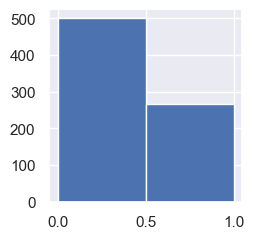

In [3]:
plt.figure(figsize=(2.5,2.5))
diabetes_df['Outcome'].hist(bins=2)

In [4]:
X, Y = diabetes_df.drop('Outcome', axis=1), diabetes_df['Outcome']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=random_seed, stratify=Y)

<AxesSubplot: >

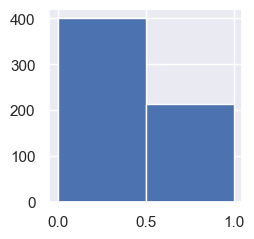

In [5]:
plt.figure(figsize=(2.5,2.5))
Y_train.hist(bins=2)  # так как сделали стратифицированную выборку

In [6]:
rfc = RandomForestClassifier(random_state=random_seed, n_estimators=100)
rfc_model = rfc.fit(X_train, Y_train)

Text(0.5, 1.0, 'Top Features derived by Random Forest')

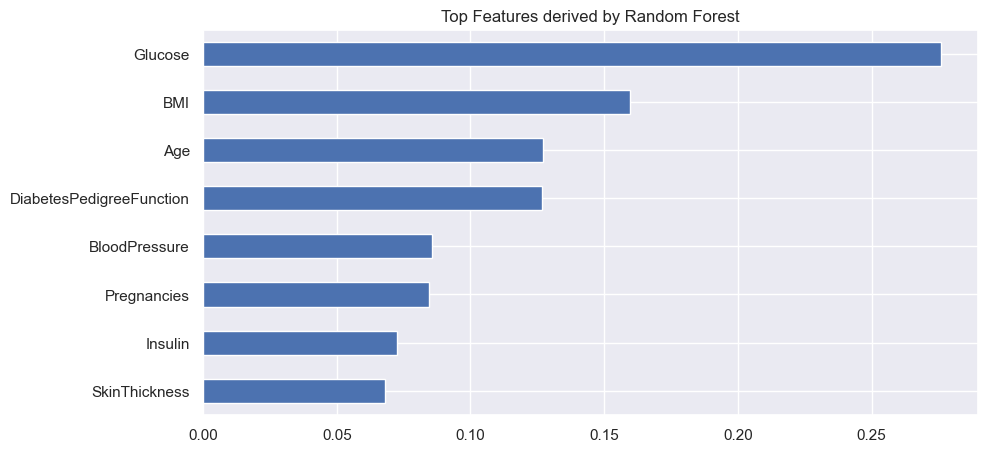

In [7]:
feature_importances = pd.Series(rfc_model.feature_importances_, index=X.columns)
feature_importances = feature_importances.nlargest(8)
fig = feature_importances.plot(kind='barh',figsize=(10,5))
fig.invert_yaxis()
plt.title('Top Features derived by Random Forest')

Text(0.5, 1.0, 'Glucose vs Age')

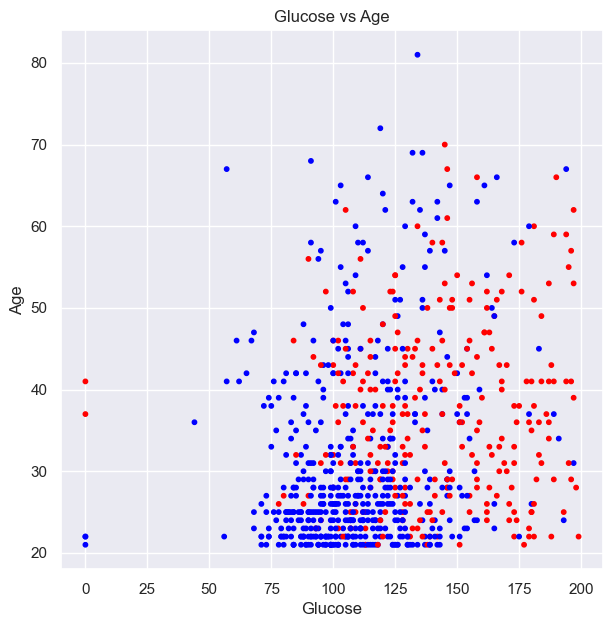

In [8]:
colors_arr = np.array(['blue', 'red'])
plt.scatter(diabetes_df['Glucose'], diabetes_df['Age'], c=colors_arr[diabetes_df['Outcome']], s=10)
plt.xlabel('Glucose')
plt.ylabel('Age')
plt.title('Glucose vs Age')

In [9]:
# из графика выше замечаем, что высокая концентрация здоровых людей
# в возрасте не старше 30 лет и уровне глюкозы меньше 120
# из этого наблюдения генерируем первую фичу для классификатора
diabetes_df.loc[:, 'Feature1'] = 1
diabetes_df.loc[(diabetes_df['Age'] <= 30) & (diabetes_df['Glucose'] <= 120), 'Feature1'] = 0

Text(0.5, 1.0, 'Glucose vs BloodPressure')

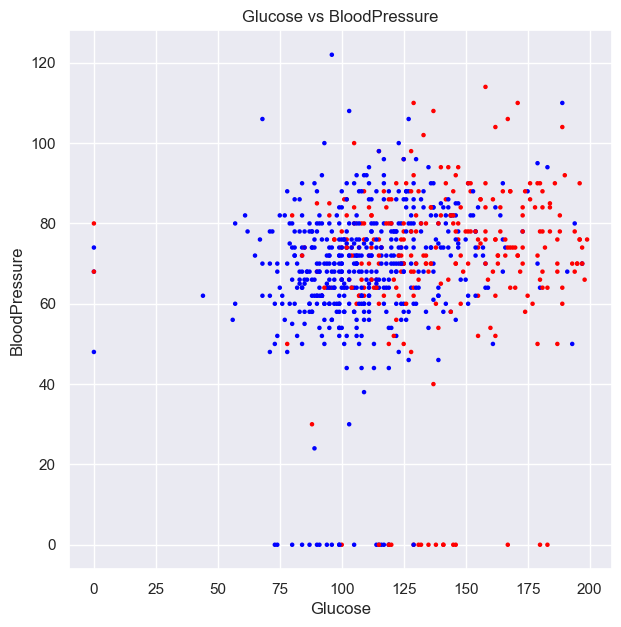

In [10]:
plt.scatter(diabetes_df['Glucose'], diabetes_df['BloodPressure'], c=colors_arr[diabetes_df['Outcome']], s=5)
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Glucose vs BloodPressure')

In [11]:
# из графика выше замечаем, что высокая концентрация здоровых людей
# при уровне глюкозы меньше 105 и кровяном давлении меньше 80
# из этого наблюдения генерируем первую фичу для классификатора
diabetes_df.loc[:, 'Feature2'] = 1
diabetes_df.loc[(diabetes_df['Glucose'] <= 105) & (diabetes_df['BloodPressure'] <= 80), 'Feature2'] = 0

In [12]:
diabetes_df.loc[:, 'Feature3'] = 1
diabetes_df.loc[diabetes_df['BMI'] <= 30, 'Feature3'] = 0

In [13]:
diabetes_df.loc[:, 'Feature4'] = 1
diabetes_df.loc[(diabetes_df['Age'] <= 30) & (diabetes_df['Pregnancies'] <= 6), 'Feature4'] = 0

In [14]:
diabetes_df.loc[:, 'Feature5'] = 1
diabetes_df.loc[diabetes_df['SkinThickness'] <= 20, 'Feature5'] = 0

In [15]:
diabetes_df.loc[:, 'Feature6'] = 1
diabetes_df.loc[(diabetes_df['BMI'] <= 30) & (diabetes_df['SkinThickness'] <= 20), 'Feature6'] = 0

In [16]:
diabetes_df.loc[:, 'Feature7'] = 1
diabetes_df.loc[(diabetes_df['Glucose'] <= 105) & (diabetes_df['BMI'] <= 30), 'Feature7'] = 0

In [17]:
diabetes_df.loc[:, 'Feature8'] = 1
diabetes_df.loc[diabetes_df['Insulin'] <= 200, 'Feature8'] = 0

In [18]:
diabetes_df.loc[:, 'Feature9'] = 1
diabetes_df.loc[diabetes_df['BloodPressure'] <= 80, 'Feature9'] = 0

In [19]:
diabetes_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,Feature1,Feature2,Feature3,Feature4,Feature5,Feature6,Feature7,Feature8,Feature9
0,6,148,72,35,0,33.6,0.627,50,1,1,1,1,1,1,1,1,0,0
1,1,85,66,29,0,26.6,0.351,31,0,1,0,0,1,1,1,0,0,0
2,8,183,64,0,0,23.3,0.672,32,1,1,1,0,1,0,0,1,0,0
3,1,89,66,23,94,28.1,0.167,21,0,0,0,0,0,1,1,0,0,0
4,0,137,40,35,168,43.1,2.288,33,1,1,1,1,1,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0,1,0,1,1,1,1,1,0,0
764,2,122,70,27,0,36.8,0.340,27,0,1,1,1,0,1,1,1,0,0
765,5,121,72,23,112,26.2,0.245,30,0,1,1,0,0,1,1,1,0,0
766,1,126,60,0,0,30.1,0.349,47,1,1,1,1,1,0,1,1,0,0


In [20]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(diabetes_df.iloc[:, 9:])
normalized_features

array([[ 0.73632104,  0.65790259,  0.80722544, ...,  0.45139977,
        -0.35277606, -0.52309831],
       [ 0.73632104, -1.51998185, -1.23881131, ..., -2.2153312 ,
        -0.35277606, -0.52309831],
       [ 0.73632104,  0.65790259, -1.23881131, ...,  0.45139977,
        -0.35277606, -0.52309831],
       ...,
       [ 0.73632104,  0.65790259, -1.23881131, ...,  0.45139977,
        -0.35277606, -0.52309831],
       [ 0.73632104,  0.65790259,  0.80722544, ...,  0.45139977,
        -0.35277606, -0.52309831],
       [-1.35810325, -1.51998185,  0.80722544, ...,  0.45139977,
        -0.35277606, -0.52309831]])

In [21]:
X_train, X_test, Y_train, Y_test = train_test_split(normalized_features, Y, test_size=.2, random_state=random_seed, stratify=Y)